# Trabalho 01 - SME0829 - Aprendizado de Máquina

***

Grupo:
* Francisco de Miranda - 4402962
* Heitor Carvalho Pinheiro - 11833351
* Lucas Yuki Okuno - 11965992
* Victor Botelho Cardoso - 11953925


***

## Modelos de Regressão Linear

### Índice:

1. [Introdução](#1)
2. [Conjunto de Dados](#2)
3. [Análise](#3)
4. [Modelo de Machine Learning](#4)
5. [Validação](#5)
6. [Conclusão](#6)

## Introdução <a class= "anchor" id = 1></a>
Usamos o programa Python para estar analisando os dados, para usar os dados usamos o google colab. A escolha se deu pelos seguintes critérios: Fácil aprendizado; Simples de programar; Sintaxe intuitiva;Open Source; Modularização; Multiplataforma; Grande quantidade de bibliotecas disponíveis; Grande comunidade de usuários; Documentação extensa; Número de oportunidades no mercado de trabalho.

O conjunto de dados escolhido foi o palmerpenguins. Desejamos analisar a massa corporal dos pinguins.

In [13]:
!pip install Jinja2 -q
!pip install palmerpenguins -q pycaret -q
!pip install markupsafe==2.0.1 -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [14]:
import palmerpenguins

In [15]:
# import ML libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.ensemble as ske
import sklearn.linear_model as skl
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

In [16]:
import jinja2
from pycaret.classification import *

## Conjunto de Dados <a class= "anchor" id = 2></a>

![Palmer Penguins](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)

Existem 344 observações de diferentes pinguins no nosso dataset.
Temos três variáveis categóricas (`Species`, `Island` e `Sex`) e cinco variáveis numéricas (`bill_length_mm`,	`bill_depth_mm`,
                	`flipper_length_mm`,	`body_mass_g`)

### Dicionário de Variáveis

* `Species`: Espécie do Pinguin (Adelie, Gentoo ou Chinstrap)
* `Island`: Ilha no Arquipelago de Palmer (Biscoe, Dream ou Torgersen)
* `bill_length_mm`: Comprimento do bico em mm
* `bill_depth_mm`: Profundidade do bico em mm
* `flipper_length_mm`: Comprimento da nadadeira em mm
* `body_mass_g`: Massa corporal em gramas
* `sex`: Sexo do pinguin (Male ou Female)

In [17]:
#raw df
df_raw = palmerpenguins.load_penguins()

#df
df = palmerpenguins.load_penguins()
features = df.columns[:-1]
df = df.drop(columns = 'year')

#reordering the columns
new_cols = ['island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex','species']

df = df.reindex(columns = new_cols)
df.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species
0,Torgersen,39.1,18.7,181.0,3750.0,male,Adelie
1,Torgersen,39.5,17.4,186.0,3800.0,female,Adelie
2,Torgersen,40.3,18.0,195.0,3250.0,female,Adelie
3,Torgersen,NaN,NaN,NaN,NaN,NaN,Adelie
4,Torgersen,36.7,19.3,193.0,3450.0,female,Adelie


## Análise <a class= "anchor" id = 3></a>

#### Limpeza dos dados

In [18]:
# find NA values
df.isnull().sum()

island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
species               0
dtype: int64

In [19]:
# filling numerical features with the mean and categorical with the mode
for i in list(df.columns[1:5]):
  df[i] = df[i].fillna(value=df[i].mean())
  
df['sex'] = df['sex'].fillna("male")

#### Correlações 

<Figure size 864x432 with 0 Axes>

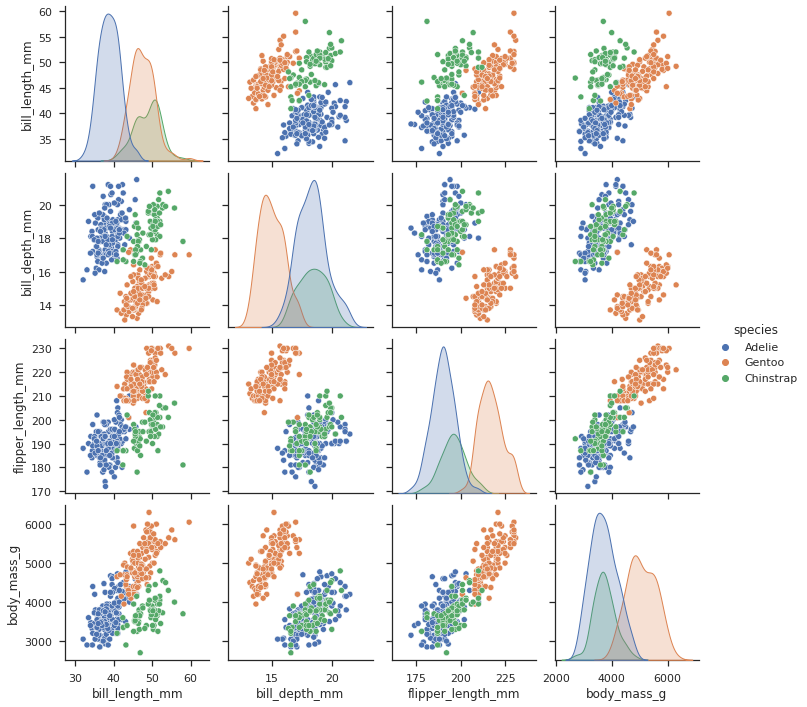

In [20]:
# scatter plots
plt.figure(figsize=(12,6))
sns.set_theme(style="ticks")

sns.pairplot(df, hue="species")
plt.show()


Algumas conclusões:

1. Pinguins Adelie têm o comprimento de bico menores.
2. Pinguins Adelie têm as menores nadadeiras.
3. Pinguins Gentoo têm, no geral, o peso e as nadadeiras maiores que as outras espécies



### Massa corporal dos pinguins

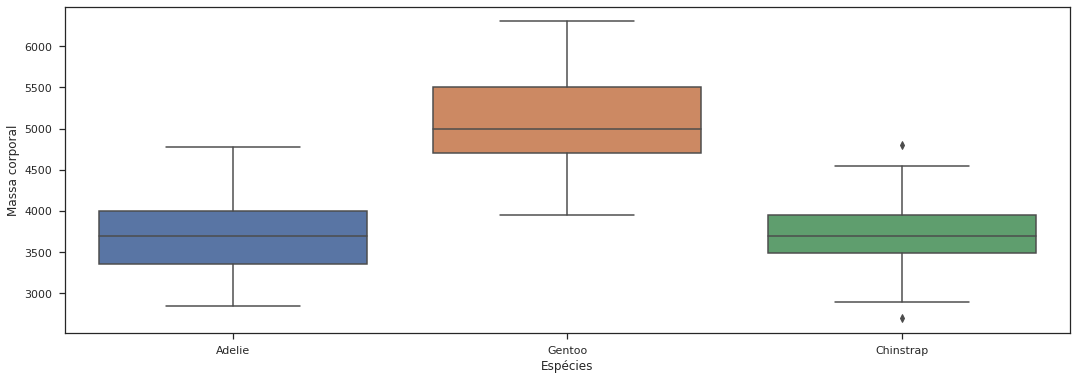

In [21]:
plt.figure(figsize=(18,6))

g = sns.boxplot(x='species',
                y = 'body_mass_g',
                data = df)

g.set_xlabel('Espécies')
g.set_ylabel('Massa corporal')
plt.show()

Portanto, as espécies Adelie e Chinstrap, possuem em média, massas corporais parecidas, 
por volta dos 3,7Kg. Enquanto que a espécie Gentoo, apresenta a maior massa corporal 
média em torno de 5Kg.

In [22]:
df.groupby(["species"])["body_mass_g"].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Adelie,152.0,3703.958910,458.848798,2850.0,3350.0,3700.0,4000.0,4775.0
Chinstrap,68.0,3733.088235,384.335081,2700.0,3487.5,3700.0,3950.0,4800.0
Gentoo,124.0,5068.965761,508.164382,3950.0,4700.0,5000.0,5500.0,6300.0


#### Comprimento do Bico

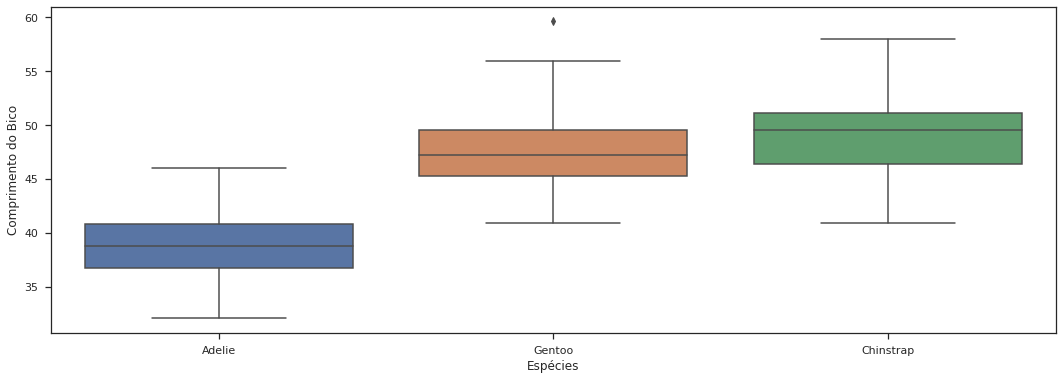

In [23]:
plt.figure(figsize=(18,6))

g = sns.boxplot(x='species',
                y = 'bill_length_mm',
                data = df)

g.set_xlabel('Espécies')
g.set_ylabel('Comprimento do Bico')
plt.show()

Os pinguins da espécie Adelie possuem comprimento do bico consideravelmente menor em 
relação às outras espécies. Já as espécies Gentoo e Chinstrap, possuem comprimento do 
bico bem próximo.

In [24]:
df.groupby(["species"])["bill_length_mm"].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Adelie,152.0,38.825144,2.686991,32.1,36.775,38.80,40.800,46.0
Chinstrap,68.0,48.833824,3.339256,40.9,46.350,49.55,51.075,58.0
Gentoo,124.0,47.475983,3.086123,40.9,45.275,47.25,49.525,59.6


Relação entre o Comprimento do Bico e a Massa Corporal


<Figure size 864x432 with 0 Axes>

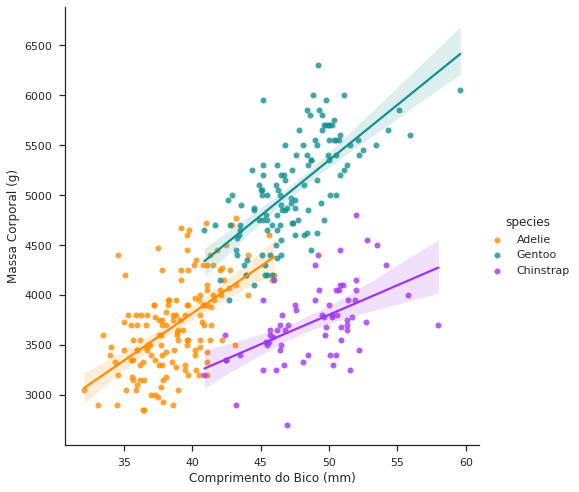

In [25]:
plt.figure(figsize=(12,6))

g = sns.lmplot(x="bill_length_mm",
               y="body_mass_g",
               hue="species",
               height=7,
               data=df,
               palette=['#FF8C00','#159090','#A034F0'])
g.set_xlabels('Comprimento do Bico (mm)')
g.set_ylabels('Massa Corporal (g)')

plt.show()

### Profundidade do bico

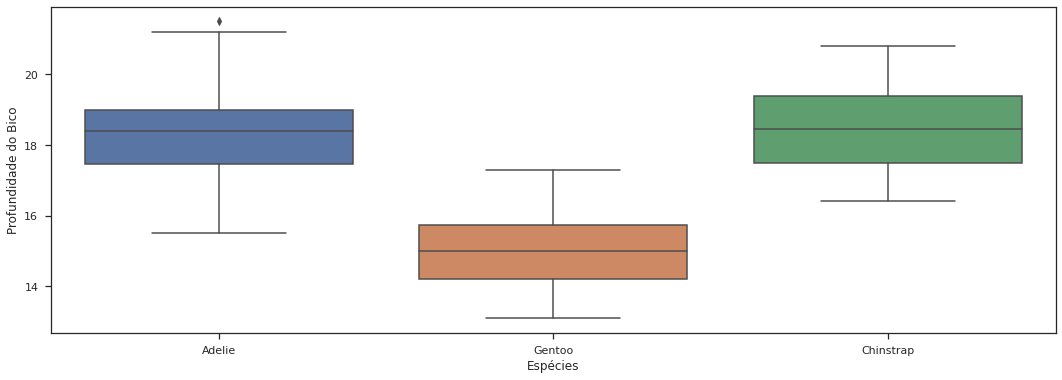

In [26]:
plt.figure(figsize=(18,6))

g = sns.boxplot(x='species',
                y = 'bill_depth_mm',
                data = df)

g.set_xlabel('Espécies')
g.set_ylabel('Profundidade do Bico')
plt.show()

Através desse boxplot, podemos observar que em média, os pinguins da espécie Gentoo 
possuem a menor profundidade de bico entre as três espécies. E para as espécies 
Adelie e Chinstrap, possuem profundidade do bico semelhantes.


In [27]:
df.groupby(["species"])["bill_depth_mm"].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Adelie,152.0,18.338495,1.216483,15.5,17.475,18.40,19.000,21.5
Chinstrap,68.0,18.420588,1.135395,16.4,17.500,18.45,19.400,20.8
Gentoo,124.0,14.999606,0.996447,13.1,14.200,15.00,15.725,17.3


Relação entre a profundidade do Bico e a Massa Corporal

<Figure size 864x432 with 0 Axes>

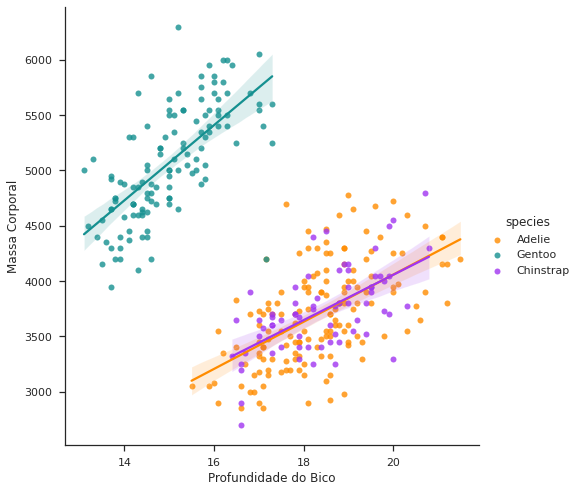

In [28]:
plt.figure(figsize=(12,6))

g = sns.lmplot(x="bill_depth_mm",
               y="body_mass_g",
               hue="species",
               height=7,
               data=df,
               palette=['#FF8C00','#159090','#A034F0'])
g.set_xlabels('Profundidade do Bico')
g.set_ylabels('Massa Corporal')

plt.show()

### Comprimento das Nadadeiras

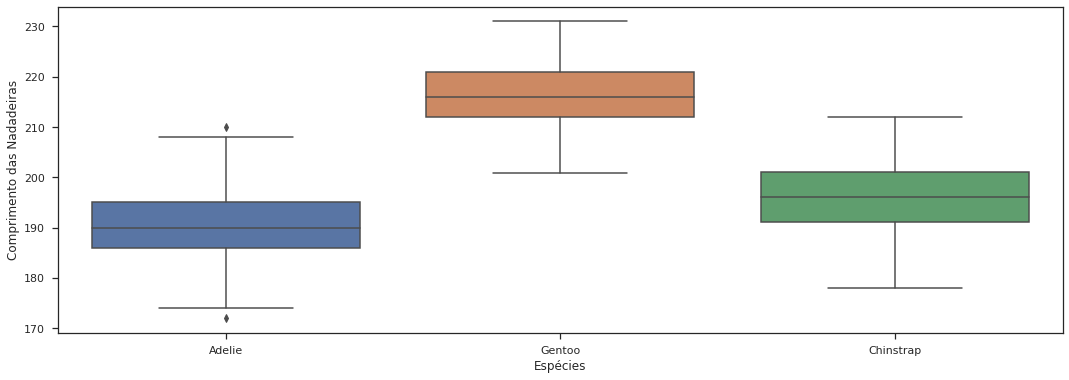

In [29]:
plt.figure(figsize=(18,6))

g = sns.boxplot(x='species',
                y = 'flipper_length_mm',
                data = df)

g.set_xlabel('Espécies')
g.set_ylabel('Comprimento das Nadadeiras')
plt.show()

Podemos observar que os pinguins da espécie Gentoo, possuem 
o maior comprimento das nadadeiras. Enquanto as espécies Adelie e Chinstrap 
tem menor comprimento de nadadeira mas semelhantes.

In [30]:
df.groupby(["species"])["flipper_length_mm"].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Adelie,152.0,190.025758,6.578130,172.000000,186.0,190.0,195.0,210.0
Chinstrap,68.0,195.823529,7.131894,178.000000,191.0,196.0,201.0,212.0
Gentoo,124.0,217.055768,6.621801,200.915205,212.0,216.0,221.0,231.0


Relação entre o comprimento da Nadadeira e a Massa Corporal

<Figure size 864x432 with 0 Axes>

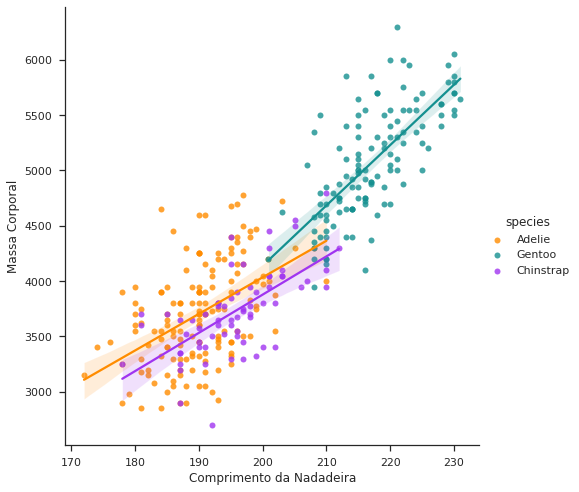

In [31]:
plt.figure(figsize=(12,6))

g = sns.lmplot(x="flipper_length_mm",
               y="body_mass_g",
               hue="species",
               height=7,
               data=df,
               palette=['#FF8C00','#159090','#A034F0'])
g.set_xlabels('Comprimento da Nadadeira')
g.set_ylabels('Massa Corporal')

plt.show()

### Análise por Sexo

<Figure size 864x432 with 0 Axes>

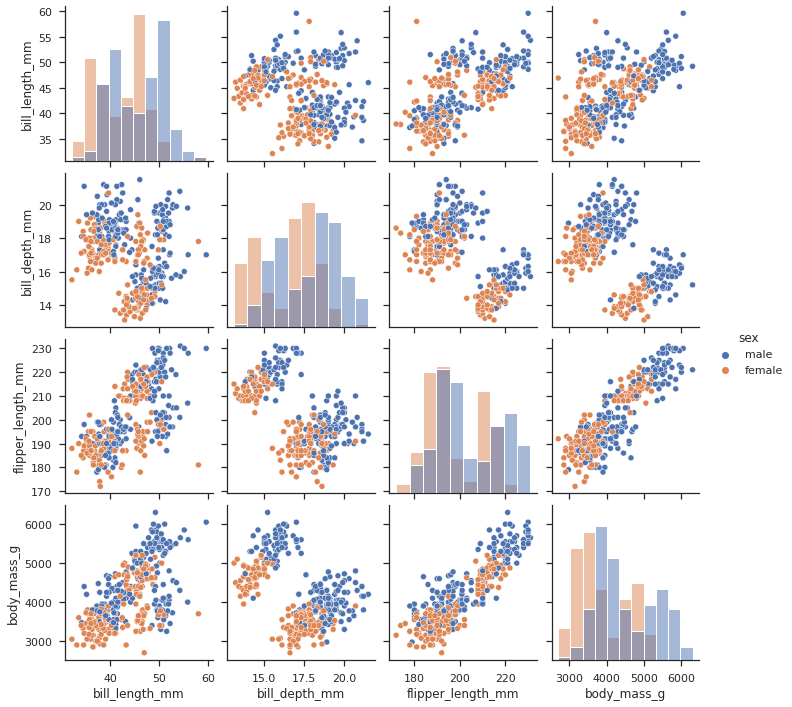

In [32]:
# Scatter plots
plt.figure(figsize=(12,6))
sns.set_theme(style="ticks")

sns.pairplot(df, hue="sex", diag_kind = "hist",
             x_vars = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"],
             y_vars = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"])
plt.show()


#### Distribuição dos Sexos por Ilha

In [33]:
df.groupby(["island"])["sex"].value_counts()

island     sex   
Biscoe     male      88
           female    80
Dream      male      63
           female    61
Torgersen  male      28
           female    24
Name: sex, dtype: int64

A distribuição dos sexos dos pinguins por ilha, é uma divisão quase "meio a meio"

In [34]:
df.groupby(["sex"])[["body_mass_g", "bill_length_mm", "bill_depth_mm", "flipper_length_mm"]].mean()

,body_mass_g,bill_length_mm,bill_depth_mm,flipper_length_mm
sex,,,,
female,3862.272727,42.096970,16.425455,197.363636
male,4514.684407,45.604156,17.820125,204.188997


Verificamos que os pinguins machos têm o peso médio consideravelmente maior que as fêmeas e suas nadadeiras também são maiores. O gênero não interfere tanto no tamanho e profundidade do bico.


### Classificação das características dos pinguins por Espécie

1. **Massa Corporal**: 

  * Machos mais pesados que fêmeas. Gentoo mais pesado que as outras duas espécies.

2. **Comprimento do Bico**:

  * Chinstrap e Gentoo apresentam média de comprimento semelhante e superior a Adelie

3. **Profundidade do Bico**
  *  Adelie e Chinstrap apresentam profundidade de bicos semelhantes e superior ao Gentoo
4. **Comprimento das Nadadeiras**
  * A média do comprimento das nadadeiras, em ordem crescente: Adelia, Chinstrap e Gentoo. 

## Modelo de ML <a class= "anchor" id = 4></a>

Neste exemplo, ao invés de tentarmos predizer uma variável quantitativa - **a massa corporal** dos pinguins, iremos tentar **predizer a espécie do pinguin**, com base em suas características físicas.

Deste modo, utilizaremos Métodos não paramétricos de classificação.

Discretizando as features categoricas utilizando um LabelEncoder


In [48]:
# encoding categorical features

df = pd.get_dummies(df, columns=['sex', 'island'], drop_first=True)

KeyError: ignored

Modelos não-paramétricos para tentar predizer a  `Espécie` dos pinguins baseado nas outras variáveis numéricas.

Portanto nossa Label é `species`


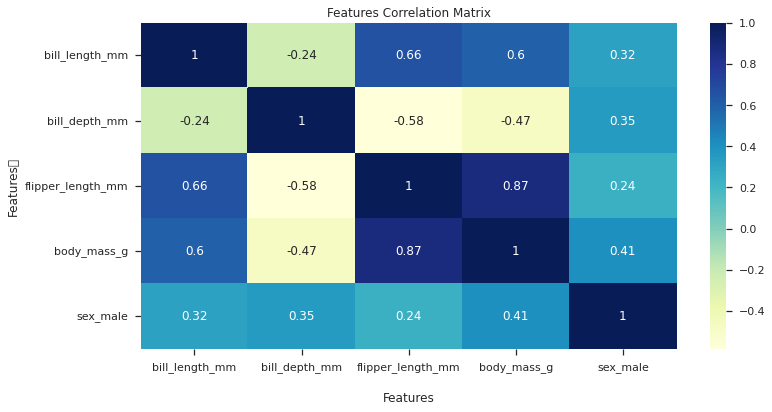

In [36]:
#Correlograma (mapa de calor) para realizar a feature selection
plt.figure(figsize=(12,6))

cols = df.columns[:-2]

corr = df[cols].corr()

hm = sns.heatmap(corr, annot=True, cmap='YlGnBu')
hm.set(xlabel='\nFeatures', ylabel = 'Features\t', title = 'Features Correlation Matrix')

plt.show()

Percebemos que a correlação entre a espécie e a maioria das features é acima de 60%. Exceto, a variável `sexo` que apresenta correlação de 0.011

Separando o conjunto de teste e treinamento, realizando um *hold-out* de 30%. Ou seja, separamos 30% dos nossos dados para teste.

E, padronizando as ***features***

In [50]:
cols = list(df.columns)
cols.remove('species')

X = df[cols]
y = df['species']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [51]:
# fitting the KNN Model
#creating a GridSearch for finding out best value of n_neighbors for KNN

from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1,10)}
knn = KNeighborsClassifier()

knn_cv = GridSearchCV(knn, param_grid, cv = 5)

knn_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [39]:
knn_cv.best_params_

{'n_neighbors': 1}

O modelo nos diz que o melhor valor de k para a classificação é 1

In [40]:
print("KNN Model Accuracy:", knn_cv.best_score_)

KNN Model Accuracy: 0.8072727272727273


#### Plotando a região de decisão do KNN

In [54]:
#erro aqui tbm
from sklearn.decomposition import PCA

y_train_dummy = pd.get_dummies(y_train)

plt.figure(figsize=(12,6))

pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
knn.fit(X_train2, y_train)

plot_decision_regions(X_train2, y_train_dummy, knn)
plt.show()

ValueError: ignored

<Figure size 864x432 with 0 Axes>

## Modelo Árvore de Decisão

O modelo de Árvore de Decisão implementado na biblioteca sckit-learn usa o algoritmo CART (Classification and Regression Trees) o qual produz apenas árvores binárias, cada nó tem apenas 2 filhos, portanto.

Algoritmos como o ID3, pode prosuzir árvores cujos nós tem mais filhos.

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
#features and target variable
X = df[cols]
y = df['species']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# train ans test dimensions
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_test.head(10)

X_train shape: (275, 7)
X_test shape: (69, 7)


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_male,island_Dream,island_Torgersen
308,42.5,16.7,187.0,3350.0,0,1,0
235,50.0,15.9,224.0,5350.0,1,0,0
7,39.2,19.6,195.0,4675.0,1,0,1
46,41.1,19.0,182.0,3425.0,1,1,0
319,45.5,17.0,196.0,3500.0,0,1,0
151,41.5,18.5,201.0,4000.0,1,1,0
120,36.2,17.2,187.0,3150.0,0,0,1
224,48.2,15.6,221.0,5100.0,1,0,0
305,52.8,20.0,205.0,4550.0,1,1,0
334,50.2,18.8,202.0,3800.0,1,1,0


**Observação**: Árvores são modelos que requerem uma preparação muito baixa dos dados. Algoritmos de Árvores de Decisão não necessitam de *feature scalling*

In [61]:
#initializing the model
dt = DecisionTreeClassifier(max_depth = 4, criterion='entropy')

#fitting the model
dt.fit(X_train, y_train)

#Predicting the values
y_pred = dt.predict(X_test)

In [62]:
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy Score: 0.9420289855072463
              precision    recall  f1-score   support

      Adelie       0.94      0.97      0.95        32
   Chinstrap       0.86      0.86      0.86        14
      Gentoo       1.00      0.96      0.98        23

    accuracy                           0.94        69
   macro avg       0.93      0.93      0.93        69
weighted avg       0.94      0.94      0.94        69



## Visualizando a região de decisão da Árvore

In [63]:
X_train = X_train.to_numpy()

#treating the y_train array
y_train = y_train.to_numpy()

species_dict = {"Adelie":0, "Gentoo":1, "Chinstrap":2}
coded_y_train = []
for i in y_train:
  i = i.replace(i, str(species_dict[i]))
  coded_y_train.append(i)
y_train = np.asarray(coded_y_train).astype(np.int64)

ValueError: ignored

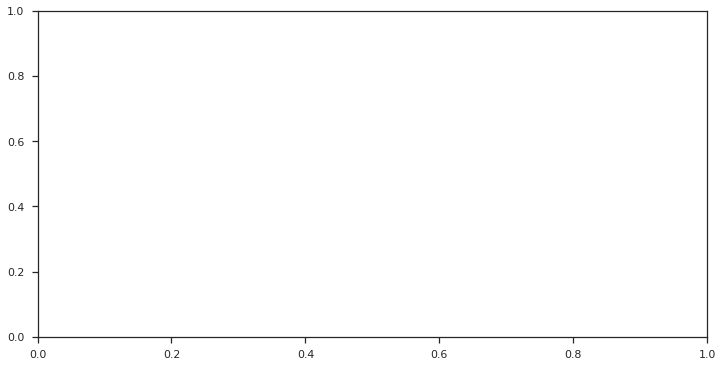

In [64]:
##erro aqui
plt.figure(figsize=(12,6))

pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)

plot_decision_regions(X_train, y_train, dt)
plt.show()

## Feature Importance

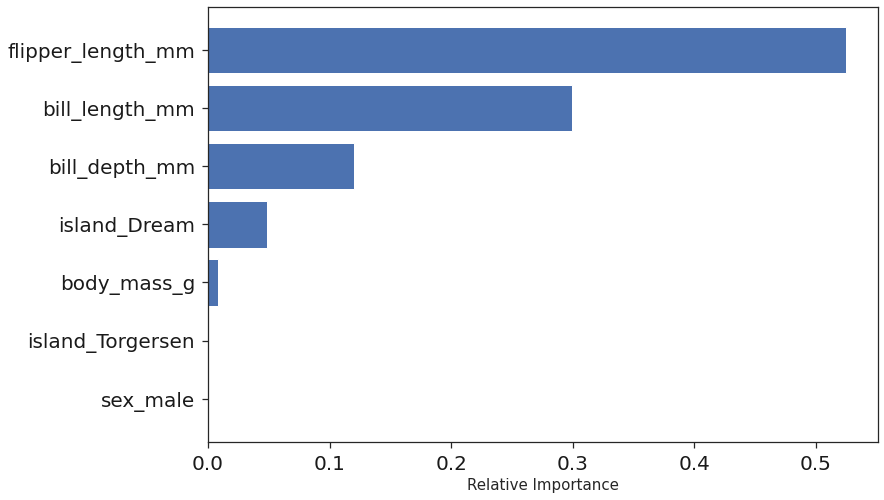

In [65]:
importances = dt.feature_importances_
indices = np.argsort(importances)
lmeas_order = []
for i in indices:
    lmeas_order.append(X.columns[i])
plt.figure(figsize=(12,8))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), lmeas_order, fontsize=15)
plt.xlabel('Relative Importance',fontsize=15)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.show()

## Visualizando a Árvore de Decisão

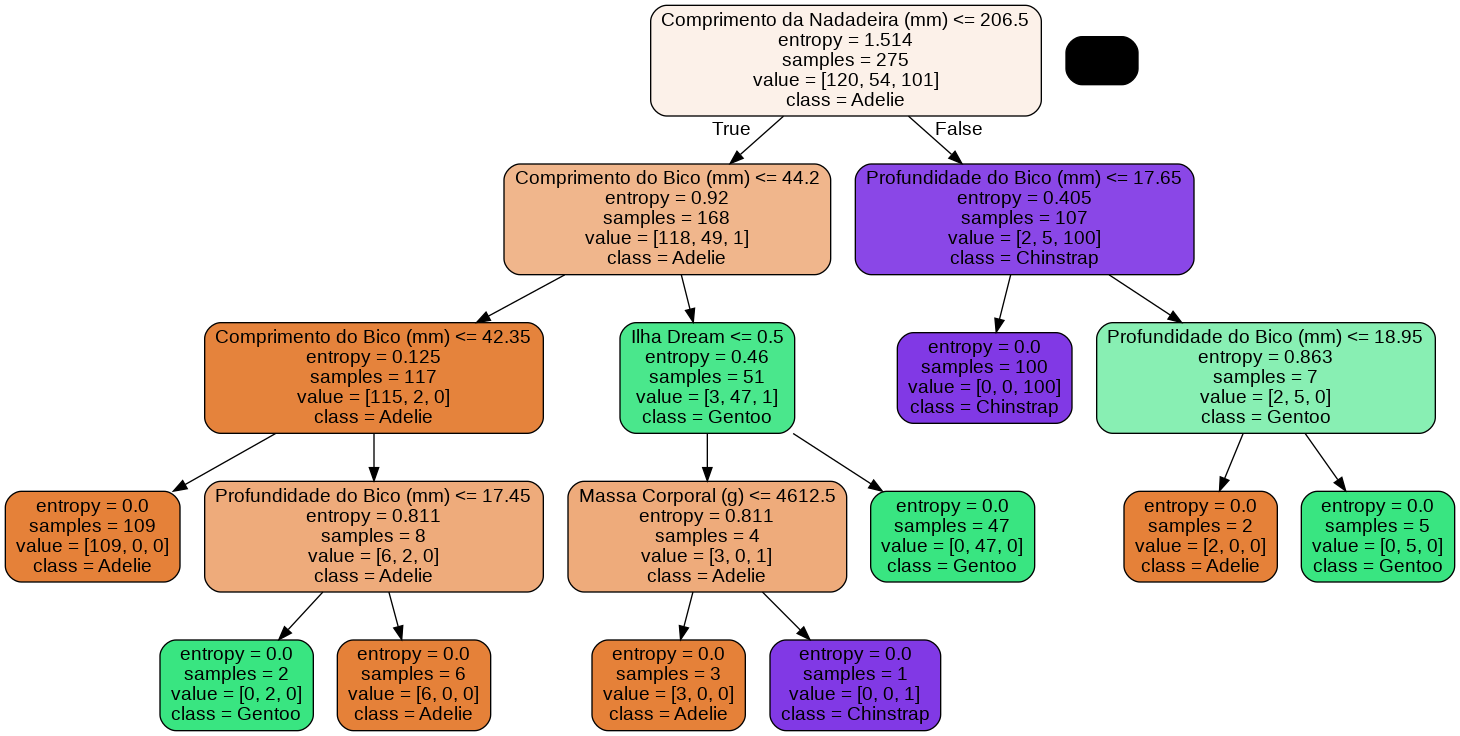

In [66]:
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

#creating DOT

col_names = ["Comprimento do Bico (mm)", "Profundidade do Bico (mm)", "Comprimento da Nadadeira (mm)", 
             "Massa Corporal (g)", "Sexo Masculino", "Ilha Dream", "Ilha Torgersen"]

dot = export_graphviz(dt, filled=True, rounded=True,
                      feature_names=col_names, class_names=df['species'].unique())

#plotting the decision_tree
graph = pydotplus.graph_from_dot_data(dot)  
Image(graph.create_png())

### Interpretação da Árvore

Perceba que cada nó em nossa árvore, contém 4 *atributos*:

* **Entropy**: A entropia é uma medida de pureza para definir o *ganho de informação*. Cada nó, possui um grau de *impureza*. Um grau de entropia = 0 significa que todos os integrantes do nó, pertecem à mesma classe.

A Entropia se calcula da seguinte maneira:

$$
H_i = - \sum_{k=1}^{n}p_{i,k}log_2(p_{i,k}), \forall ~ p_{i,k} \neq 0
$$

Onde $p_{i,k}$ é a porcentagem relativa da classe $k$ dentro do nó $i$
* **Samples**: O atributo `samples` nos diz em quantos observações no conjunto de treinamento a condição do nó se aplica. No exemplo do primeiro nó, 168 pinguins tem comprimento do bico menor do que 44.2 mm.

* **Value**: O atributo `value` é usado para computar a probabilidade de pertencer a cada classe. `value` corresponde ao número de entradas no conjunto de teste que estão inseridas no nó e pertencem a cada classe. Logo um value de [118, 49, 1], significa que para todos os pinguins pertencentes ao nó, há 70.2% de probabilidade de ser da espécie Adelie, 32.7% de pertencer a Gentoo e 0.02% de pertencer a Chinstrap.

* **Class**: A classe com maior probabilidade no nó

  Tais valores são retornados com a função `<model>.predict_proba([<array of features>])`

***

## Conclusão <a class= "anchor" id = 6></a>

Podemos concluir que o modelo de regressão linear foi o modelo com o melhor desempenho segundo o critério de $R^2$, na tentativa de prever a massa corporal dos pinguins, considerando as outras variáveis presentes nos dados e utilizando como métrica o *Coeficiente de Determinação R2*, responsável por medir quanto da variablidade dos dados pode ser explicada pelo modelo.

Desse modo, o modelo de regressão linear foi capaz de explicar cerca de 89% da variablidade do modelo, quando o objetivo era prever a massa corporal dos pinguins.

O modelo de regularização Ridge, também apresentou um resultado quase que idêntico ao da regressão linear, que seria o modelo escolhido se o critério adotado fosse o de menor erro quadrático.

### Utilizando o Pycaret realizar a classificação de outros modelos

In [ ]:
clf1 = setup(df_raw, target = 'species')

In [ ]:
best = compare_models()

### Região de decisão para diferentes modelos

In [ ]:
##erro aqui tbm
from itertools import product
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay


clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(gamma=0.1, kernel="rbf", probability=True)
clf4 = RandomForestClassifier(criterion= 'gini')

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
clf4.fit(X,y)

# Plotting decision regions
f, axarr = plt.subplots(2, 2, sharex="col", sharey="row", figsize=(10, 8))
for idx, clf, tt in zip(
    product([0, 1], [0, 1]),
    [clf1, clf2, clf3, eclf],
    ["Decision Tree (depth=4)", "KNN (k=7)", "Kernel SVM", "Random Forest"],
):
    DecisionBoundaryDisplay.from_estimator(
        clf, X, alpha=0.4, ax=axarr[idx[0], idx[1]], response_method="predict"
    )
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()